## Step-1: Importing Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

## Step-2: Reading the Dataset

In [5]:
news = pd.read_csv('scraped.csv')

In [6]:
news.head()

,text,label
0,Scots GPs told not to meet fever patients as f...,0
1,Coronavirus : Fighting al - Shabab propaganda ...,0
2,Engineer fears China virus impact Engineer fea...,0
3,Coronavirus : South Korean PM vows swift act...,0
4,Finnair issues profit warning over Covid - 19 ...,0


In [7]:
text_data = news['text'].astype('U')
label = news['label'].astype('U')

In [8]:
news.isnull().sum()

text     0
label    0
dtype: int64

## Step-3: Data Preprocessing

In [9]:
X_train,X_test,y_train,y_test = train_test_split(text_data,label,test_size=0.2,random_state=42)

In [10]:
vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7,lowercase=True)
X_train_transformed = vectorizer.fit_transform(X_train)

In [11]:
X_test_transformed = vectorizer.transform(X_test)

## Step-4: Model Building

In [12]:
dt = DecisionTreeClassifier()

In [13]:
dt.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [14]:
y_pred = dt.predict(X_test_transformed)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9076700134561639


In [16]:
report = classification_report(y_test,y_pred)
print("Classification report:")
print(report)

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4916
           1       0.90      0.91      0.91      4745

    accuracy                           0.91      9661
   macro avg       0.91      0.91      0.91      9661
weighted avg       0.91      0.91      0.91      9661



<Axes: >

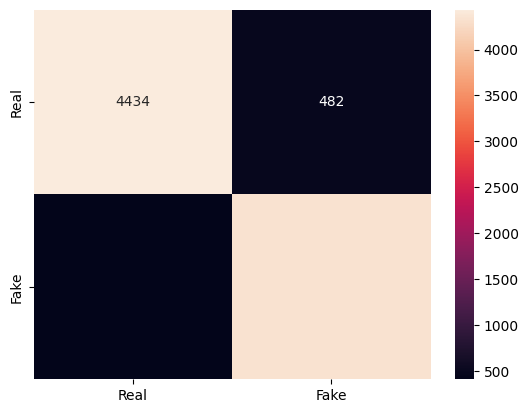

In [25]:
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix,
            annot=True,
            fmt='g', 
            xticklabels=['Real','Fake'],
            yticklabels=['Real','Fake'])